# Diabatics Prediction 

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load DataSet

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.sample(n=7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
276,7,106,60,24,0,26.5,0.296,29,1
278,5,114,74,0,0,24.9,0.744,57,0
249,1,111,86,19,0,30.1,0.143,23,0
35,4,103,60,33,192,24.0,0.966,33,0
536,0,105,90,0,0,29.6,0.197,46,0
678,3,121,52,0,0,36.0,0.127,25,1
270,10,101,86,37,0,45.6,1.136,38,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

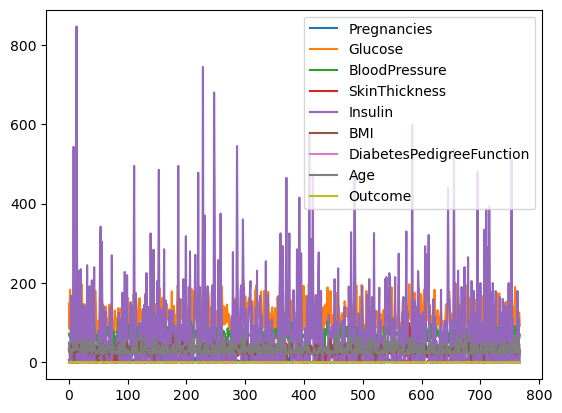

In [8]:
df.plot()

import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
import seaborn as sns

<AxesSubplot: >

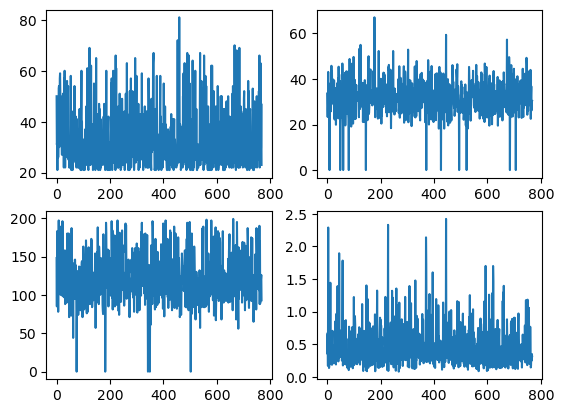

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2)


#add DataFrames to subplots
df['Age'].plot(ax=axes[0,0])
df['BMI'].plot(ax=axes[0,1])
df['Glucose'].plot(ax=axes[1,0])
df['DiabetesPedigreeFunction'].plot(ax=axes[1,1])

In [12]:
#BMI.replace(to_replace = 0, value = BMI.median(), inplace=True)
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

### Correlation of Features

In [13]:
aa=df.corr()
display(aa)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.218806,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.184220,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.218806,0.184220,0.381740,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.312249,0.173844,0.238356,1.000000


In [14]:
a=df.corr(method ='pearson')
b = aa-a
display(b)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Glucose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BloodPressure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SkinThickness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Insulin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DiabetesPedigreeFunction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Outcome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
c= df.corr(method='kendall')


d = c-a
display(d)
d.style.background_gradient(cmp='viridus')\.set_properties(**{'font-size':'10px'})

d.max().sort_values()

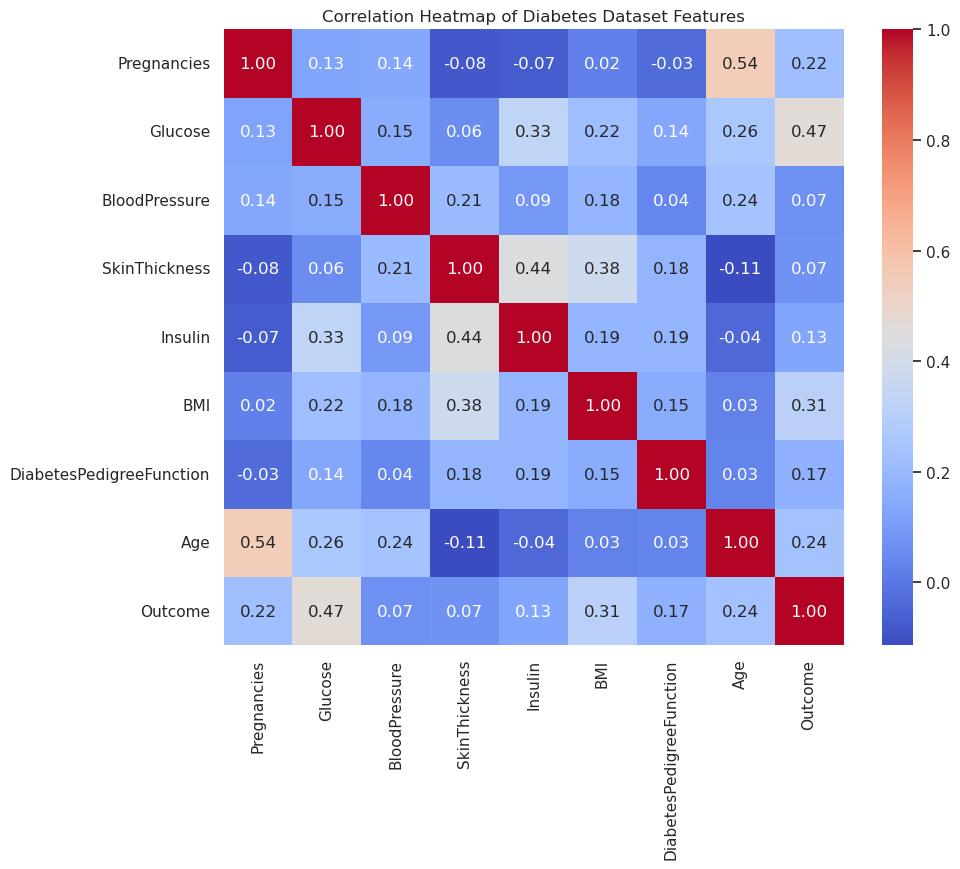

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
sns.set()  # Set seaborn style
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Create heatmap
plt.title('Correlation Heatmap of Diabetes Dataset Features')  # Set title
plt.show()  # Display the heatmap

### Feature Selecting 

In [16]:
X = df[['Pregnancies', 'BMI', 'BloodPressure', 'SkinThickness', 'Age']]

In [17]:
Y = df['Outcome']

### Pre-Processing

In [18]:
!pip install sklearn

In [19]:
import sys
print(sys.path)


['/home/koder/wA_Projects/wA_Diabetes', '/home/koder/anaconda3/envs/good/lib/python310.zip', '/home/koder/anaconda3/envs/good/lib/python3.10', '/home/koder/anaconda3/envs/good/lib/python3.10/lib-dynload', '', '/home/koder/anaconda3/envs/good/lib/python3.10/site-packages', '/home/koder/anaconda3/envs/good/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg']


!pip uninstall scikit-learn
!pip install scikit-learn


In [20]:
from sklearn import preprocessing

standard = preprocessing.scale(X)
print(standard)

[[ 0.63994726  0.16724016  0.14964075  0.90726993  1.4259954 ]
 [-0.84488505 -0.85155088 -0.16054575  0.53090156 -0.19067191]
 [ 1.23388019 -1.33183808 -0.26394125 -1.28821221 -0.10558415]
 ...
 [ 0.3429808  -0.90976751  0.14964075  0.15453319 -0.27575966]
 [-0.84488505 -0.34215536 -0.47073225 -1.28821221  1.17073215]
 [-0.84488505 -0.29849289  0.04624525  0.65635768 -0.87137393]]


### Cross Validation

In [21]:
from sklearn.model_selection import KFold, cross_val_score

In [22]:
from sklearn.linear_model import LogisticRegression

## Traning Model 

In [23]:
from sklearn.linear_model import LogisticRegressionCV
my_mod = LogisticRegressionCV(Cs=7,
                        solver="lbfgs",
                        tol=0.0002,
                        max_iter=10000,
                        cv=5)
my_mod.fit(X, Y)
my_mod.score(X, Y)

0.6940104166666666

In [24]:
df.sample(n=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
736,0,126,86,27,120,27.4,0.515,21,0
618,9,112,82,24,0,28.2,1.282,50,1
339,7,178,84,0,0,39.9,0.331,41,1


### Saving The Model 

In [25]:
import pickle

# Export the trained model using pickle
filename = 'model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(my_mod, f)
    
import os

cwd = os.getcwd()
print(f"The model was saved in {os.path.join(cwd, filename)}")

The model was saved in /home/koder/wA_Projects/wA_Diabetes/model.pkl


### GUI

In [26]:
import pickle
import tkinter as tk
from tkinter import ttk

class MyTkinterApp(tk.Tk):
    
    def __init__(self):
        super().__init__()
        self.title('Diabetes Prediction')
        style = ttk.Style(self)
        style.theme_use('clam')
        
        # Set custom font for the app
        self.custom_font = ('Arial', 20)
        self.option_add('*Font', self.custom_font)
        
        # Set app background color to light gray
        self.configure(bg='#EFEFEF')
        
        # Load the pre-trained model using pickle
        try:
            with open('model.pkl', 'rb') as f:
                self.model = pickle.load(f)
        except (IOError, FileNotFoundError, pickle.PickleError) as e:
            print(f"Error loading the model: {e}")
            self.destroy()
        
        # Create a layout with a label, five text input boxes, a button, and a text widget for output
        layout = ttk.Frame(self, padding=20)
        
        # Set label and input box font color to dark gray
        label_style = ttk.Style()
        label_style.configure('TLabel', foreground='#333333')
        input_style = ttk.Style()
        input_style.configure('TEntry', foreground='#333333')
        
        # Add label at the top
        message = "With diabetes, your body doesn't make enough insulin or can't use it as well as it should. When there isn't enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease."
        ttk.Label(layout, text=message, wraplength=600).grid(column=0, row=0, columnspan=2, pady=20)
        
        labels = ['Pregnancies (0-20)', 'BMI (0-70)', 'Blood Pressure (0-200)', 'Skin Thickness (0-100)', 'Age (0-100)']
        for i, label in enumerate(labels):
            ttk.Label(layout, text=label).grid(column=0, row=i+1, sticky='w')
        
        self.inputs = []
        for i in range(5):
            input_box = ttk.Entry(layout, width=10, font=self.custom_font)
            self.inputs.append(input_box)
            input_box.grid(column=1, row=i+1)
            # Set input box background color to light gray
            input_box.configure(style='TEntry', background='#EFEFEF')
        
        predict_button = ttk.Button(layout, text='Predict', command=self.predict)
        predict_button.grid(column=1, row=6, pady=20)
        
        output_box = tk.Text(layout, height=1, width=20, font=self.custom_font, foreground='#333333', background='white', highlightbackground='#333333', highlightthickness=1)
        output_box.grid(column=0, row=7, columnspan=2, pady=20)
        
        layout.pack()
        self.output_box = output_box
    
    def predict(self):
        # Get the input values from the text input boxes
        input_data = []
        for input_box in self.inputs:
            # Validate that the input is a valid integer
            try:
                input_value = int(input_box.get())
                if input_value < 0:
                    self.output_box.delete('1.0', tk.END)
                    self.output_box.insert(tk.END, f'Invalid input: {input_box.get()}. Must be a non-negative integer.')
                    return
            except ValueError:
                self.output_box.delete('1.0', tk.END)
                self.output_box.insert(tk.END, f'Invalid input: {input_box.get()}. Must be a non-negative integer.')
                return
            input_data.append(input_value)
        
        # Use the model to make predictions
        prediction = self.model.predict([input_data])[0]
        
        # Show the prediction in the app
        if prediction == 1:
            self.output_box.delete('1.0', tk.END)
            self.output_box.insert(tk.END, 'High risk of diabetes.')
        else:
            self.output_box.delete('1.0', tk.END)
            self.output_box.insert(tk.END, 'Low risk of diabetes.')


app = MyTkinterApp()
app.mainloop()

